In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



In [78]:
df = pd.read_csv("loan_data.csv")  
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit.policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int.rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log.annual.inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days.with.cr.line  100 non-null    float64
 9   revol.bal          100 non-null    int64  
 10  revol.util         100 non-null    float64
 11  inq.last.6mths     100 non-null    int64  
 12  delinq.2yrs        100 non-null    int64  
 13  pub.rec            100 non-null    int64  
 14  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


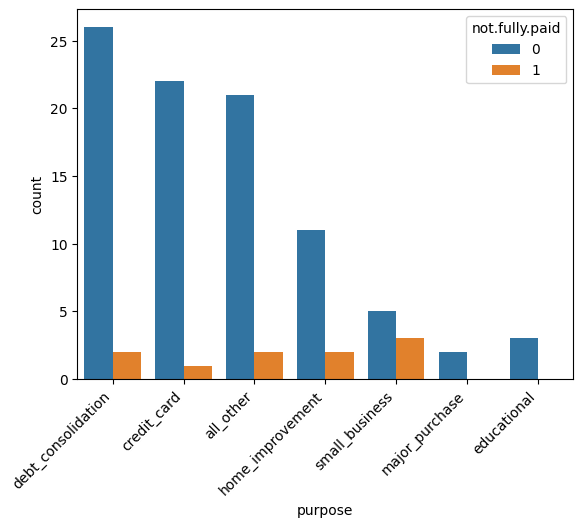

In [79]:
sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=45, ha='right')

pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
pre_df.head()

In [80]:
X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [81]:
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8484848484848485
Precision: 0.7199265381083563
Recall: 0.8484848484848485
F1 Score: 0.7789369100844511


c:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multi_model = MultinomialNB()
multi_model.fit(X_train_scaled, y_train)

y_pred_multi = multi_model.predict(X_test_scaled)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_multi))
print("MultinomialNB F1 Score:", f1_score(y_test, y_pred_multi, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))


MultinomialNB Accuracy: 0.8484848484848485
MultinomialNB F1 Score: 0.7789369100844511

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       0.00      0.00      0.00         5

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33



c:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\123\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Confusion Matrix:
 [[28  0]
 [ 5  0]]


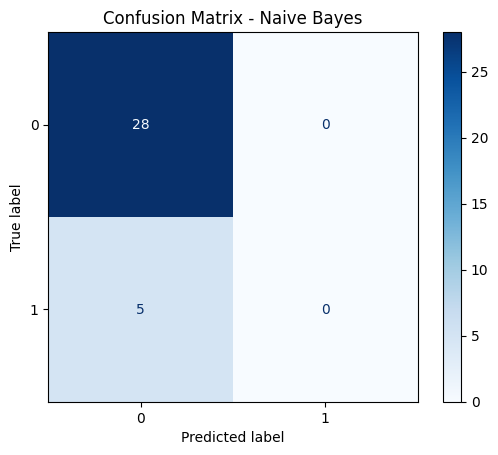

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [84]:
from sklearn.model_selection import cross_val_score

gnb_scores = cross_val_score(GaussianNB(), X, y, cv=5, scoring="accuracy")
mnb_scores = cross_val_score(MultinomialNB(), X, y, cv=5, scoring="accuracy")

print("GaussianNB CV Accuracy:", gnb_scores.mean())
print("MultinomialNB CV Accuracy:", mnb_scores.mean())

GaussianNB CV Accuracy: 0.8
MultinomialNB CV Accuracy: 0.48
